<a href="https://colab.research.google.com/github/julopezrio/SYS/blob/main/Laplace/Taller_laplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

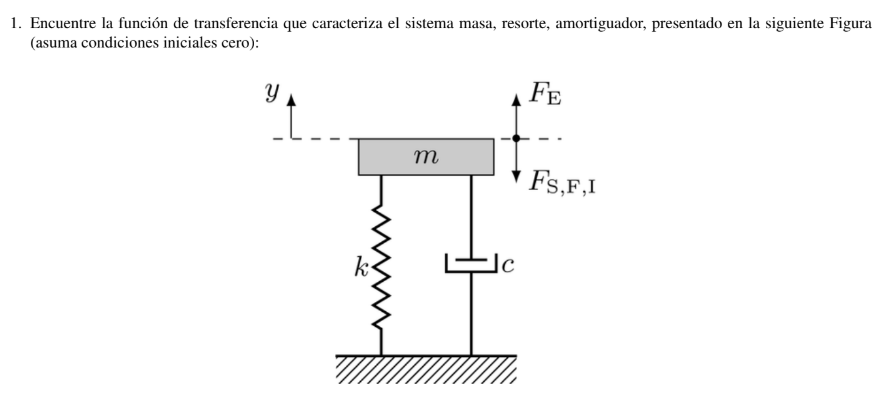

se aplica segunda ley de newton:

$$my''(t)=F_E(t)-F_s-F_d$$

donde:

$$F_E(t)$$   fuerza restauradora del resorte

$$F_s=ky(t)$$   Fuerza externa aplicada

$$F_d=cy'(t)$$  Fuerza del amortiguador

$$my''(t)+cy'(t)+ky(t)=F_E(t)$$

Se aplica Laplace a la EDO

$$ms^2Y(s)+csY(s)+kY(s)=F_e(s)$$

$$\frac{F_e(s)}{Y(s)}=ms^2+cs+k$$

$$G(s)=\frac{Y(s)}{F_e(s)}=\frac{1}{ms^2+cs+k}$$


In [ ]:
%matplotlib inline
import sympy as sym
sym.init_printing()

t, m, c, k = sym.symbols('t m c k', real=True)
x = sym.Function('x')(t)
y = sym.Function('y')(t)

ode = sym.Eq(m*y.diff(t, 2) + c*y.diff(t) + k*y, x)
ode

                         2              
  d                     d               
c⋅──(y(t)) + k⋅y(t) + m⋅───(y(t)) = x(t)
  dt                      2             
                        dt              

In [ ]:
!pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 7.4 MB/s eta 0:00:00


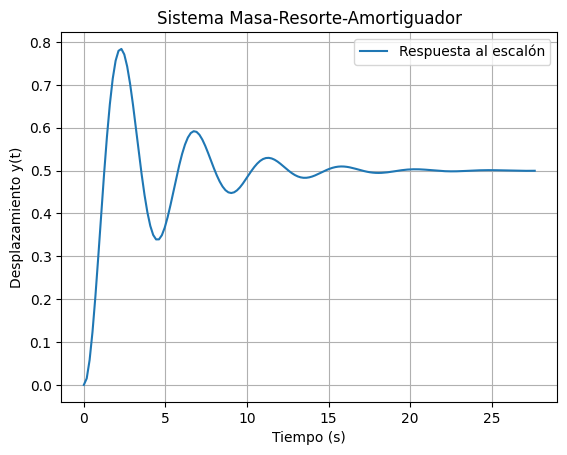

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Parámetros del sistema
m = 1.0  # Masa (kg)
c = 0.5  # Coeficiente de amortiguamiento (Ns/m)
k = 2.0  # Constante del resorte (N/m)

# Función de transferencia G(s) = 1 / (m s^2 + c s + k)
num = [1]
den = [m, c, k]
G = ctrl.TransferFunction(num, den)

# Simulación de la respuesta a un escalón unitario
t, y = ctrl.step_response(G)

# Gráfica de la respuesta
plt.figure()
plt.plot(t, y, label='Respuesta al escalón')
plt.xlabel('Tiempo (s)')
plt.ylabel('Desplazamiento y(t)')
plt.title('Sistema Masa-Resorte-Amortiguador')
plt.grid()
plt.legend()
plt.show()


# punto 2

$$Vo(t)=V_r(t)=V_c(t)=R*i_2(t)$$

$$i_1=i_2+i_R$$

$$i_1(t)=C\frac{dV_c}{dt}+\frac{V_c}{R}$$

$$V_L=L\frac{d}{dt}i_1(t)$$

$$\frac{d}{dt}i_1(t)=C\frac{d^2V_c}{dt^2}+\frac{1}{R}\frac{dV_c}{dt}$$

$$V_i(t)=L(C\frac{d^2V_c}{dt^2}+\frac{1}{R}\frac{dV_c}{dt})$$

# Punto 3


/usr/local/lib/python3.11/dist-packages/control/pzmap.py:318: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/control/freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


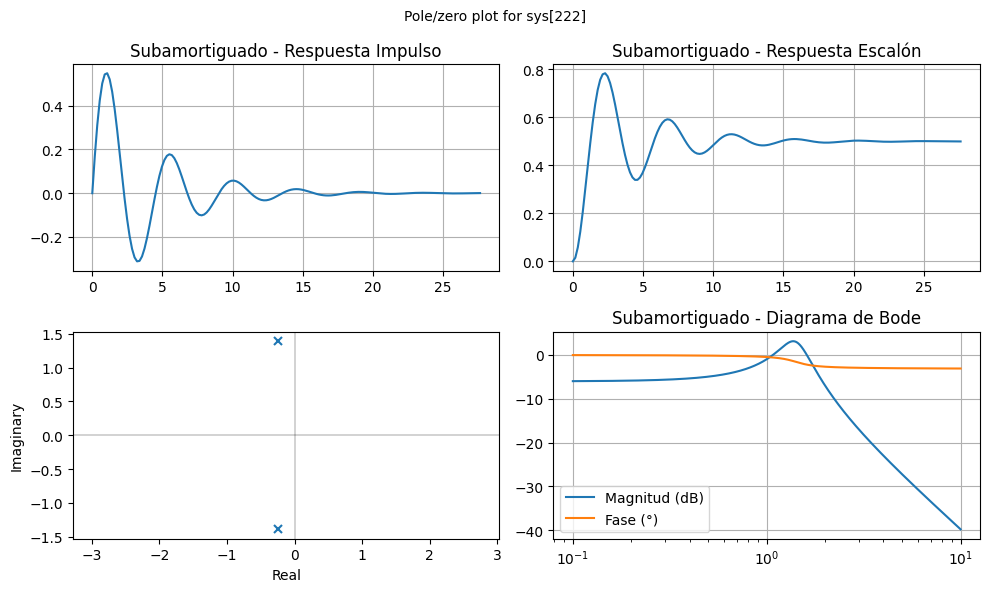

Subamortiguado:
  Frecuencia natural no amortiguada (wn): 1.41 rad/s
  Factor de amortiguamiento (zeta): 0.18
  Frecuencia amortiguada (wd): 1.39 rad/s


/usr/local/lib/python3.11/dist-packages/control/pzmap.py:318: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/control/freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


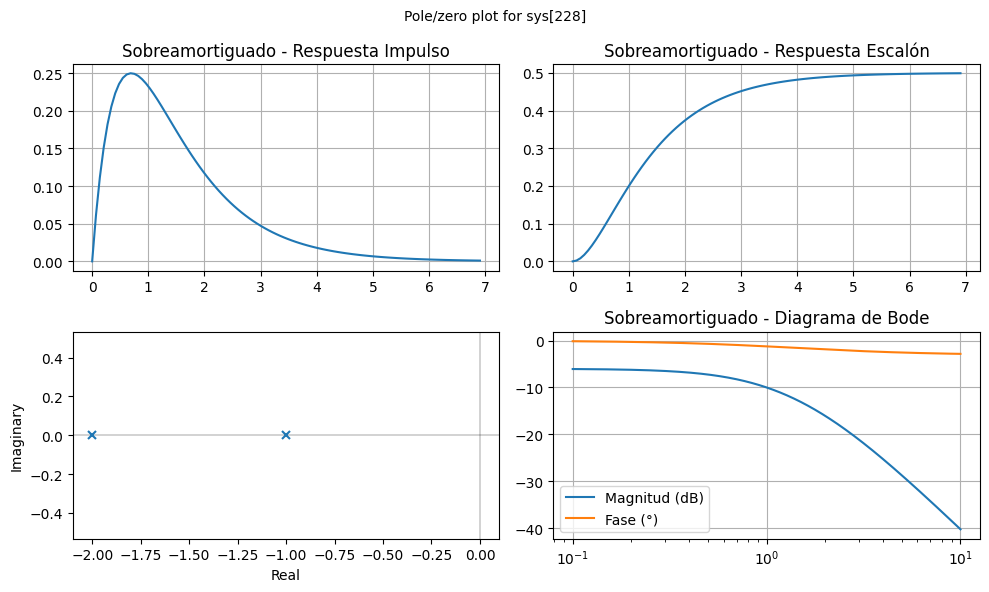

Sobreamortiguado:
  Frecuencia natural no amortiguada (wn): 1.41 rad/s
  Factor de amortiguamiento (zeta): 1.06


/usr/local/lib/python3.11/dist-packages/control/pzmap.py:318: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/control/freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


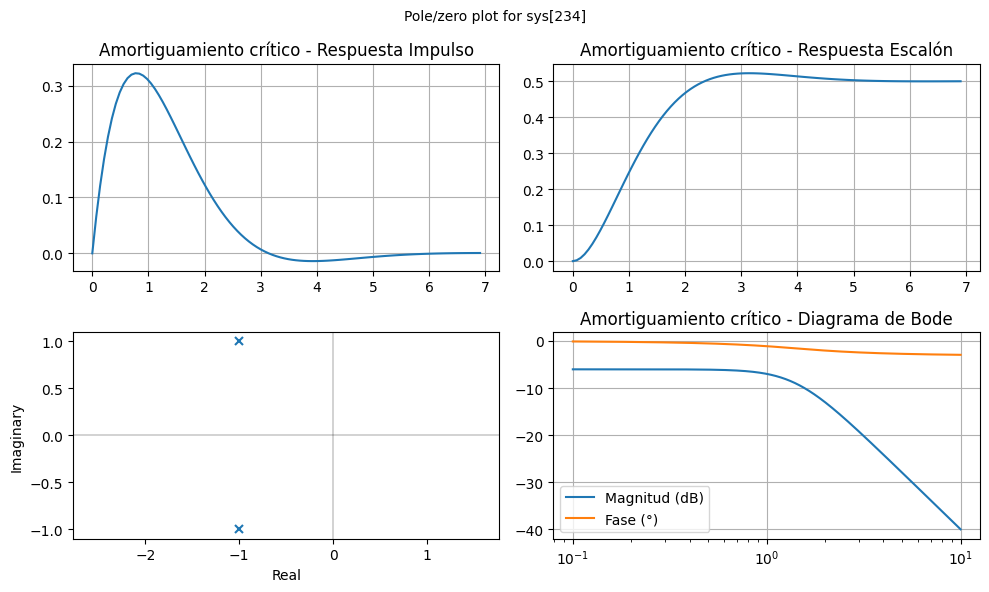

Amortiguamiento crítico:
  Frecuencia natural no amortiguada (wn): 1.41 rad/s
  Factor de amortiguamiento (zeta): 0.71
  Frecuencia amortiguada (wd): 1.00 rad/s


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl


# Definimos valores para cada caso
cases = {
    "Subamortiguado": (1, 2, 0.5),   # ζ < 1
    "Sobreamortiguado": (1, 2, 3),   # ζ > 1
    "Amortiguamiento crítico": (1, 2, 2)  # ζ = 1
}

for case, (m, k, c) in cases.items():
    wn = np.sqrt(k / m)  # Frecuencia natural
    zeta = c / (2 * np.sqrt(m * k))  # Factor de amortiguamiento
    wd = wn * np.sqrt(1 - zeta ** 2) if zeta < 1 else 0  # Frecuencia amortiguada

    # Función de transferencia en lazo abierto
    num = [1]
    den = [m, c, k]
    sys = ctrl.TransferFunction(num, den)

    # Análisis temporal
    t, y_impulse = ctrl.impulse_response(sys)
    t, y_step = ctrl.step_response(sys)

    # Gráficos
    plt.figure(figsize=(10, 6))

    plt.subplot(2, 2, 1)
    plt.title(f"{case} - Respuesta Impulso")
    plt.plot(t, y_impulse, label="Impulso")
    plt.grid()

    plt.subplot(2, 2, 2)
    plt.title(f"{case} - Respuesta Escalón")
    plt.plot(t, y_step, label="Escalón")
    plt.grid()

    plt.subplot(2, 2, 3)
    poles, zeros = ctrl.pzmap(sys, plot=True)

    plt.subplot(2,2,4)
    mag, phase, omega = ctrl.bode(sys, plot=False)
    plt.title(f"{case} - Diagrama de Bode")
    plt.semilogx(omega, 20*np.log10(mag), label="Magnitud (dB)")
    plt.semilogx(omega, phase, label="Fase (°)")
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()

    print(f"{case}:")
    print(f"  Frecuencia natural no amortiguada (wn): {wn:.2f} rad/s")
    print(f"  Factor de amortiguamiento (zeta): {zeta:.2f}")
    if zeta < 1:
        print(f"  Frecuencia amortiguada (wd): {wd:.2f} rad/s")


/usr/local/lib/python3.11/dist-packages/control/pzmap.py:318: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/control/freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


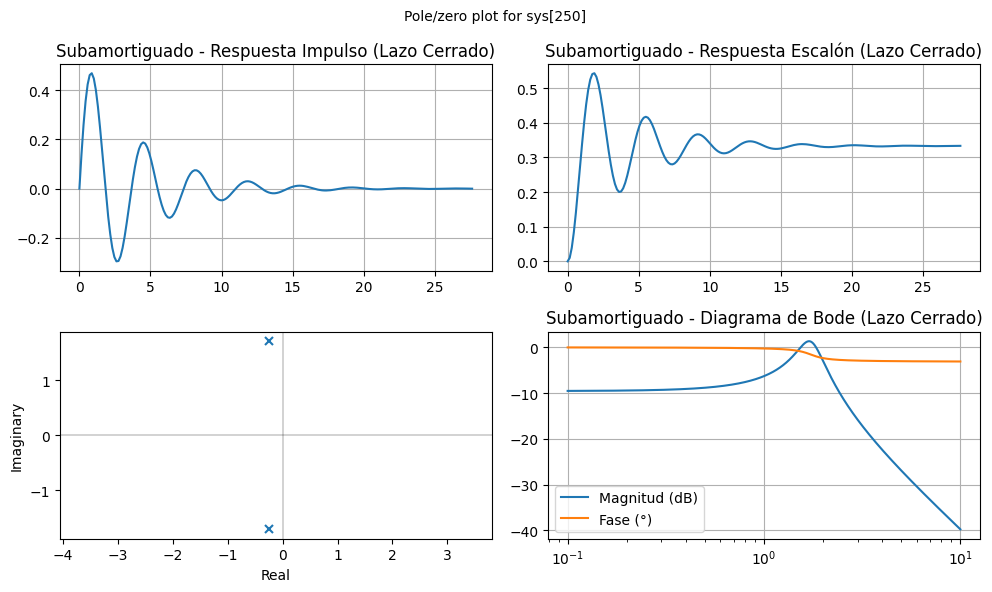

Subamortiguado:
  Frecuencia natural no amortiguada (wn): 1.41 rad/s
  Factor de amortiguamiento (zeta): 0.18
  Frecuencia amortiguada (wd): 1.39 rad/s


/usr/local/lib/python3.11/dist-packages/control/pzmap.py:318: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/control/freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


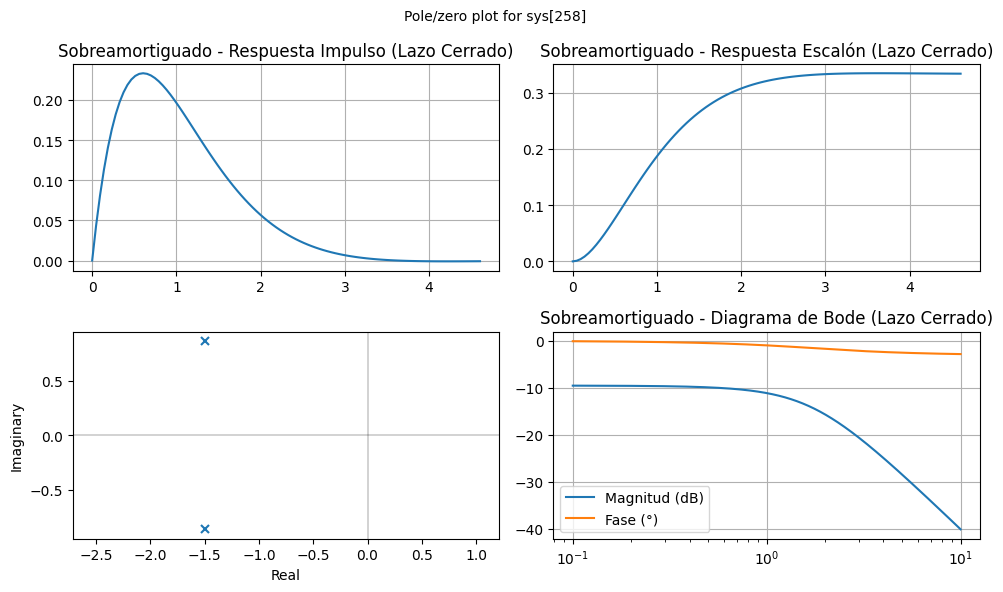

Sobreamortiguado:
  Frecuencia natural no amortiguada (wn): 1.41 rad/s
  Factor de amortiguamiento (zeta): 1.06


/usr/local/lib/python3.11/dist-packages/control/pzmap.py:318: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/control/freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


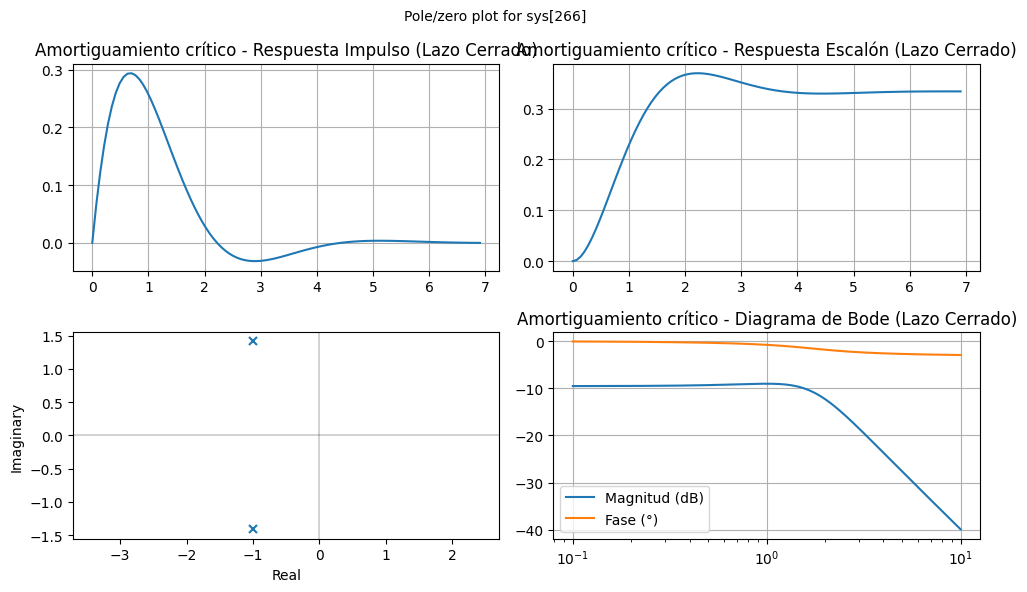

Amortiguamiento crítico:
  Frecuencia natural no amortiguada (wn): 1.41 rad/s
  Factor de amortiguamiento (zeta): 0.71
  Frecuencia amortiguada (wd): 1.00 rad/s


In [ ]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt

# Definimos valores para cada caso
cases = {
    "Subamortiguado": (1, 2, 0.5),   # ζ < 1
    "Sobreamortiguado": (1, 2, 3),   # ζ > 1
    "Amortiguamiento crítico": (1, 2, 2)  # ζ = 1
}

for case, (m, k, c) in cases.items():
    wn = np.sqrt(k / m)  # Frecuencia natural
    zeta = c / (2 * np.sqrt(m * k))  # Factor de amortiguamiento
    wd = wn * np.sqrt(1 - zeta ** 2) if zeta < 1 else 0  # Frecuencia amortiguada

    # Función de transferencia en lazo abierto
    num = [1]
    den = [m, c, k]
    sys = ctrl.TransferFunction(num, den)

    # Función de transferencia en lazo cerrado con realimentación unitaria
    sys_cl = ctrl.feedback(sys)

    # Análisis temporal en lazo cerrado
    t, y_impulse = ctrl.impulse_response(sys_cl)
    t, y_step = ctrl.step_response(sys_cl)

    # Gráficos
    plt.figure(figsize=(10, 6))

    plt.subplot(2, 2, 1)
    plt.title(f"{case} - Respuesta Impulso (Lazo Cerrado)")
    plt.plot(t, y_impulse, label="Impulso")
    plt.grid()

    plt.subplot(2, 2, 2)
    plt.title(f"{case} - Respuesta Escalón (Lazo Cerrado)")
    plt.plot(t, y_step, label="Escalón")
    plt.grid()

    plt.subplot(2, 2, 3)
    poles, zeros = ctrl.pzmap(sys_cl, plot=True)

    # Bode en lazo cerrado
    mag, phase, omega = ctrl.bode(sys_cl, plot=False)
    plt.subplot(2,2,4)
    plt.title(f"{case} - Diagrama de Bode (Lazo Cerrado)")
    plt.semilogx(omega, 20*np.log10(mag), label="Magnitud (dB)")
    plt.semilogx(omega, phase, label="Fase (°)")
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()

    print(f"{case}:")
    print(f"  Frecuencia natural no amortiguada (wn): {wn:.2f} rad/s")
    print(f"  Factor de amortiguamiento (zeta): {zeta:.2f}")
    if zeta < 1:
        print(f"  Frecuencia amortiguada (wd): {wd:.2f} rad/s")